<a href="https://colab.research.google.com/github/shubh70abhir/keras_journey/blob/main/alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 353s 2us/step


In [4]:
train_data.shape

(50000, 32, 32, 3)

In [5]:
# Flatten labels before one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels.reshape(-1), num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels.reshape(-1), num_classes=10)


In [6]:
# train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
# test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [7]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [8]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy']
              )

In [12]:
history = model.fit(train_data,train_labels,epochs=5,
                    batch_size=32,validation_data=(test_data,test_labels))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6230 - loss: 1.0610 - val_accuracy: 0.6531 - val_loss: 0.9764
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6644 - loss: 0.9534 - val_accuracy: 0.6907 - val_loss: 0.8738
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6873 - loss: 0.8887 - val_accuracy: 0.7266 - val_loss: 0.7851
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7047 - loss: 0.8385 - val_accuracy: 0.7216 - val_loss: 0.8105
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7201 - loss: 0.7879 - val_accuracy: 0.7489 - val_loss: 0.7339


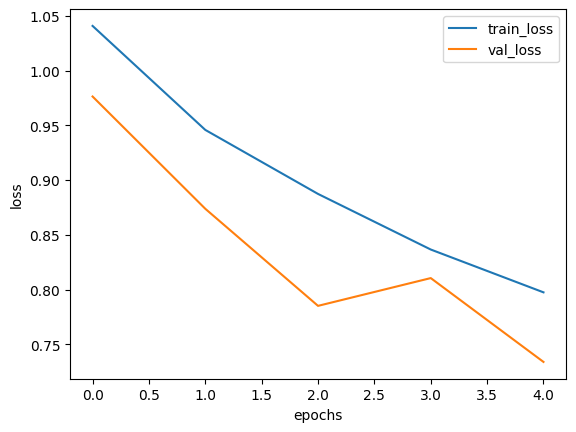

In [13]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

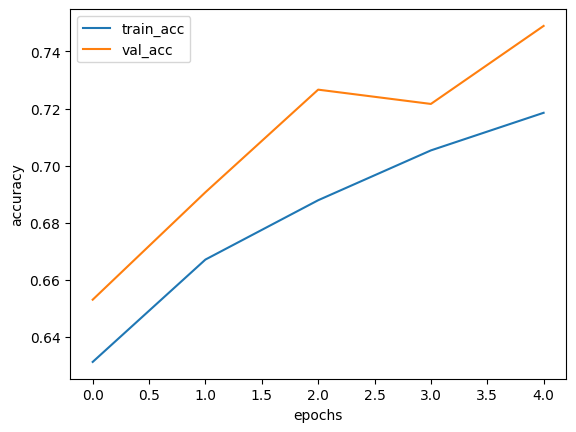

In [15]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

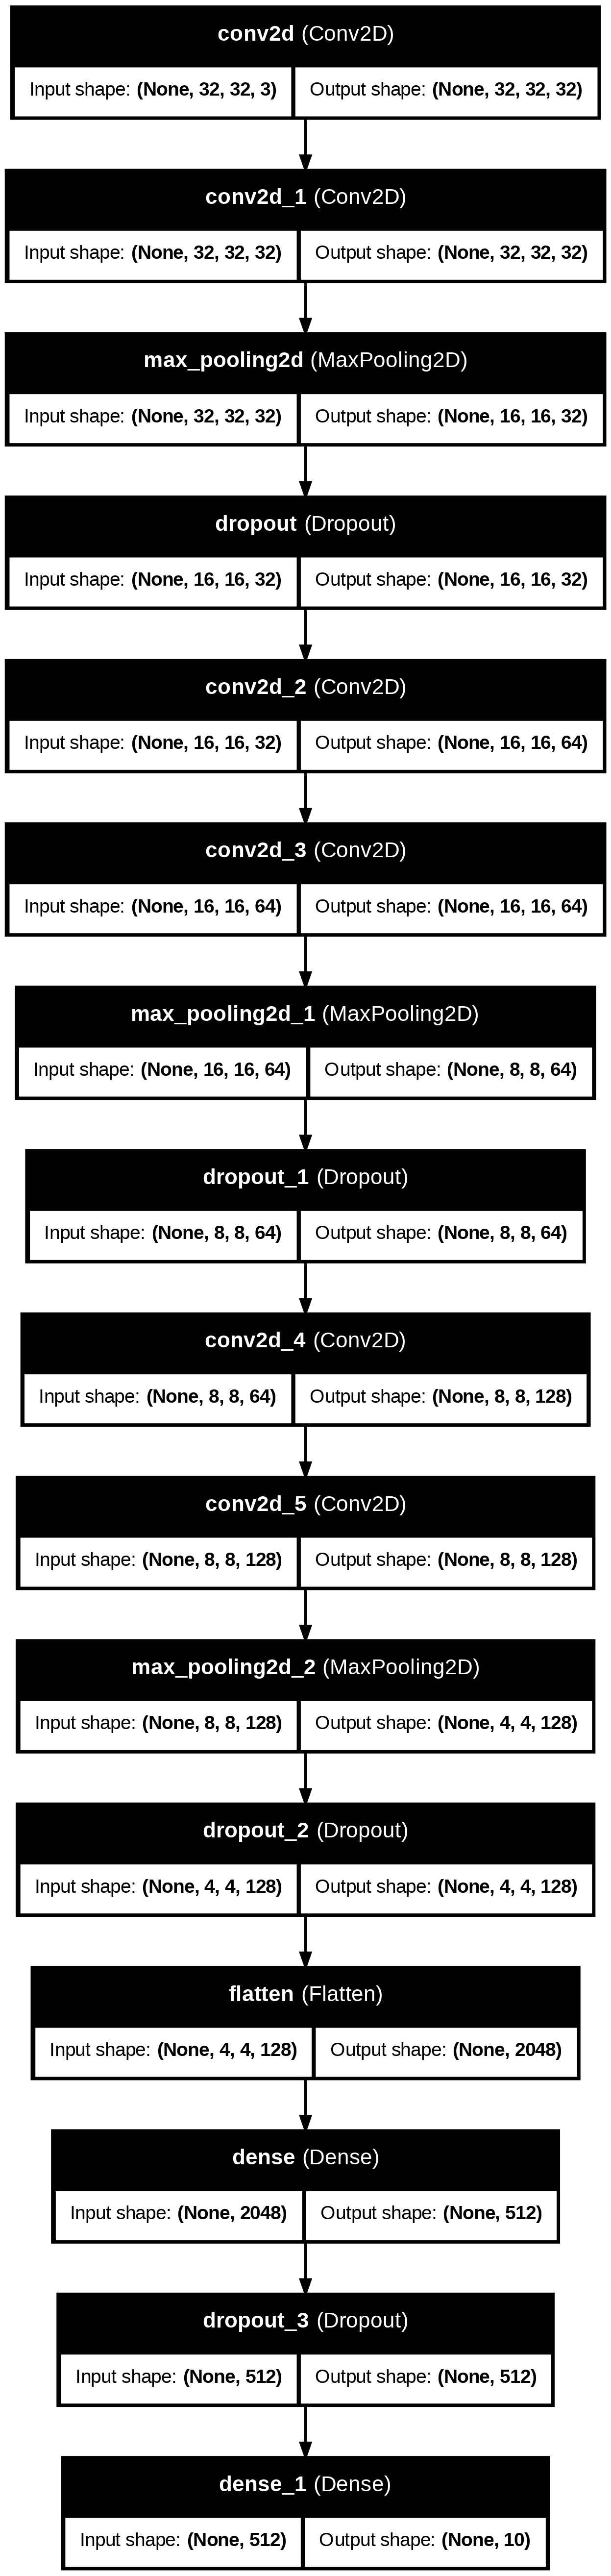

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='alexnet.png', show_shapes=True,
           show_layer_names=True)